## MS Dhoni Batting Performance - Last 3 years Analysis (2022 - 2024)

In [1]:
#Criterion

# 1. Number of matches played
# 2. Total Runs Scored
# 3. Average runs scored per tournament, 
# 4. Strike Rate for each tournament
# 5. Total Runs in Death overs
# 6. Boundary percentage



In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [3]:
# ipl_ball_by_ball_data
df = pd.read_csv('IPL_ball_by_ball_2024.csv')
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#last 3 years IPL ball_by_ball data
df.season = df.start_date.apply(lambda x:int(x.split('-')[0]))

#Split the overs and ball columns
df['over_number'] = df.ball.apply(lambda x:int(str(x).split('.')[0])+1)
df['ball_number'] = df.ball.apply(lambda x:int(str(x).split('.')[1]))

df = df[df.season >=2022]

df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over_number,ball_number
208042,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.1,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
208043,1304047,2022,2022-03-26,"Wankhede Stadium, Mumbai",1,0.2,Chennai Super Kings,Kolkata Knight Riders,RD Gaikwad,DP Conway,UT Yadav,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2


In [5]:
#Total number of matches played by 'MS Dhoni' as a batter between 2022 and 2024
dhoni_df = df[df.striker=='MS Dhoni']
dhoni_df['is_boundary'] = df.runs_off_bat.apply(lambda runs:1 if (runs==4) or (runs==6) else 0)


#Season wise - No.of matches played, Runs scored, Balls taken, Boundary count, Runs scored off boundaries, Over numbers played in each tournament


msd_df = pd.DataFrame(dhoni_df.groupby('season').agg(
    total_matches_played = ('match_id','nunique'),
    runs_off_bat = ('runs_off_bat','sum'),
    boundary_count = ('is_boundary','sum'),
    runs_off_boundaries = ('runs_off_bat',lambda x:x[dhoni_df.is_boundary==1].sum()),
    ball = ('ball','count'),
    overs_played = ('over_number','unique')).reset_index())

msd_df['strike_rate'] = 100 * msd_df['runs_off_bat']/msd_df['ball']
msd_df['boundary_percentage'] = 100 * msd_df['runs_off_boundaries']/msd_df['runs_off_bat']
msd_df


,season,total_matches_played,runs_off_bat,boundary_count,runs_off_boundaries,ball,overs_played,strike_rate,boundary_percentage
0,2022,12,232,31,144,198,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 8, 9, 10, 5, 7]",117.171717,62.068966
1,2023,12,104,13,72,63,"[18, 19, 20, 16, 17, 13]",165.079365,69.230769
2,2024,11,161,27,134,82,"[17, 18, 19, 20, 16]",196.341463,83.229814


From the above data frame, it appears that between 2022 and 2024, **MS Dhoni spent most of his time at the crease in the Death Overs** (Over No.16 to Over No.20). Therefore, its important that we **sample out the death overs records** of MS Dhoni Batting data frame to understand more on his impact in the death overs and how MS Dhoni fares against others during the death overs

In [6]:
#Total number of matches played by 'MS Dhoni' in death overs between 2022 and 2024
dhoni_death_df = dhoni_df[dhoni_df.over_number>=16]
dhoni_death_df

#MS Dhoni's Death overs statistics - (Over No.16 to 20)

#Season wise - No.of matches played, Runs scored, Balls taken, Boundary count, Runs scored off boundaries, Over numbers played in each tournament

msd_death_df = pd.DataFrame(dhoni_death_df.groupby('season').agg(
    total_matches_played = ('match_id','nunique'),
    runs_off_bat = ('runs_off_bat','sum'),
    boundary_count = ('is_boundary','sum'),
    runs_off_boundaries = ('runs_off_bat',lambda x:x[dhoni_death_df.is_boundary==1].sum()),
    ball = ('ball','count')).reset_index())

msd_death_df['strike_rate'] = 100 * msd_death_df['runs_off_bat']/msd_death_df['ball']
msd_death_df['boundary_percentage'] = 100 * msd_death_df['runs_off_boundaries']/msd_death_df['runs_off_bat']
msd_death_df['death_overs_match_percent'] = 100 * msd_death_df['total_matches_played']/msd_df['total_matches_played']
msd_death_df



,season,total_matches_played,runs_off_bat,boundary_count,runs_off_boundaries,ball,strike_rate,boundary_percentage,death_overs_match_percent
0,2022,12,174,26,122,111,156.756757,70.114943,100.000000
1,2023,11,104,13,72,62,167.741935,69.230769,91.666667
2,2024,11,161,27,134,82,196.341463,83.229814,100.000000


From the above sample, its very much evident that **MS Dhoni has a lot of impact during the death overs in the last 3 years**, where there is a **incremental progression in the strike rate** over the years, which is a very critical factor for a player in the death overs. MS Dhoni enjoys a **whopping strike rate of over 196 in the recently concluded IPL Season** and if we notice clearly, **more than 80% of the runs have come from boundaries alone**. Therefore, this proves that **MS Dhoni has a very good ability to strike the boundaries in the death overs consistently** and this is another important factor while assessing the batter performance in the death overs 

## Let's look at how others have fared in the death overs during the same period

In [7]:
all_death_df = df[df.over_number>=16]
all_death_df['is_boundary'] = df.runs_off_bat.apply(lambda runs:1 if (runs==4) or (runs==6) else 0)
all_death_df.head(2)

#Highest run getters in the death overs for the last 3 years - Minimum 150 balls to be played

all_df = pd.DataFrame(all_death_df.groupby(['striker']).agg(
            total_matches_played = ('match_id','nunique'),
            runs_off_bat = ('runs_off_bat','sum'),
            boundary_count = ('is_boundary','sum'),
            runs_off_boundaries = ('runs_off_bat',lambda x:x[all_death_df.is_boundary==1].sum()),
            ball = ('ball','count'),
            overs_played = ('over_number','unique')).reset_index())

all_df['strike_rate'] = 100 * all_df['runs_off_bat']/all_df['ball']
all_df['boundary_percentage'] = 100 * all_df['runs_off_boundaries']/all_df['runs_off_bat']


#Minimum 150 balls to be played
all_df = all_df[all_df.ball>=150].reset_index()
all_df.sort_values('strike_rate', ascending = False).head(3)


,index,striker,total_matches_played,runs_off_bat,boundary_count,runs_off_boundaries,ball,overs_played,strike_rate,boundary_percentage
5,63,H Klaasen,17,358,48,246,187,"[19, 20, 16, 17, 18]",191.443850,68.715084
8,91,KD Karthik,35,607,92,454,338,"[18, 19, 20, 17, 16]",179.585799,74.794069
19,225,TH David,30,539,73,372,305,"[16, 17, 18, 19, 20]",176.721311,69.016698


### Death overs Batting Analysis (Runs vs Strike Rate) for all the players having played at least 150 balls between 2022 and 2024

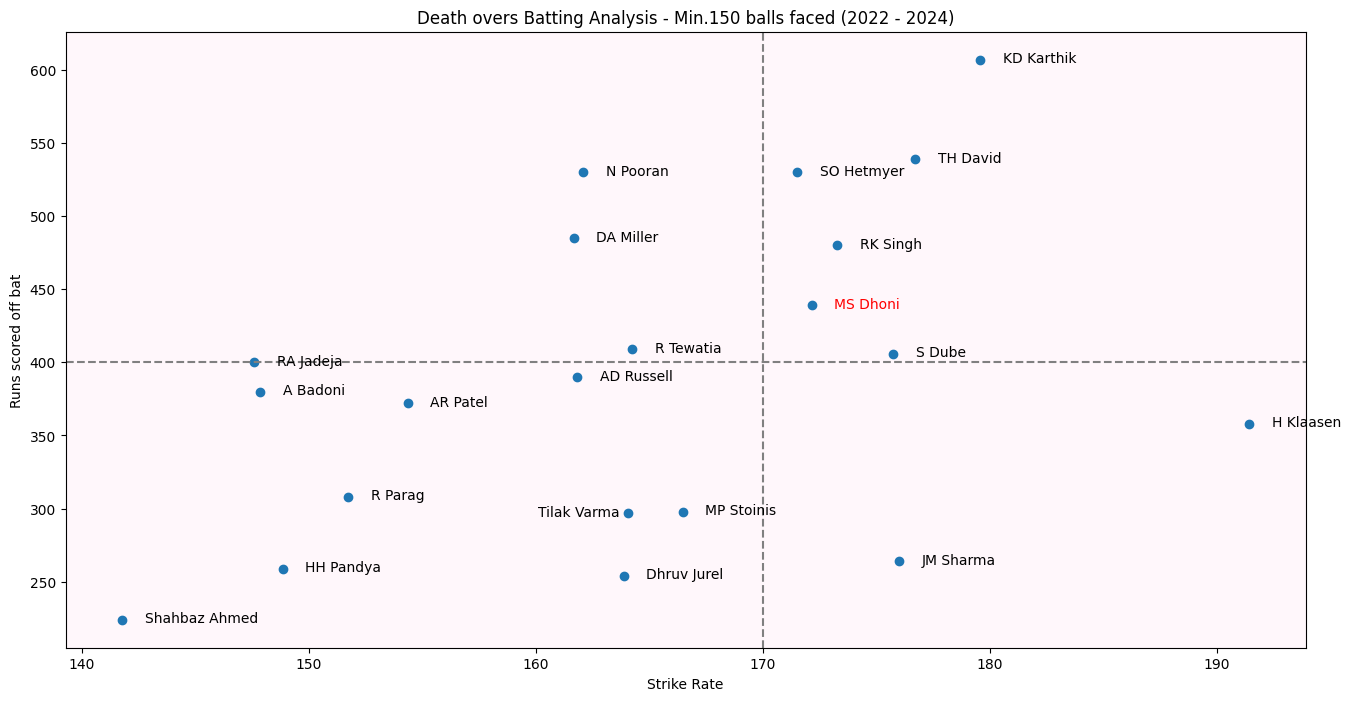

In [8]:
#Runs vs Strike Rate in the death overs between 2022 and 2024

plt.figure(figsize=(16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(all_df['strike_rate'],all_df['runs_off_bat'])

for i in range(len(all_df)):
    if all_df['striker'][i] == 'MS Dhoni':
        plt.text(all_df.strike_rate[i]+1,all_df.runs_off_bat[i]-2,all_df.striker[i], color = 'red')
    elif all_df['striker'][i] == 'Tilak Varma':
        plt.text(all_df.strike_rate[i]-4,all_df.runs_off_bat[i]-2,all_df.striker[i])
    else:
        plt.text(all_df.strike_rate[i]+1,all_df.runs_off_bat[i]-2,all_df.striker[i])

plt.axvline(170, ls='--', color='grey')
plt.axhline(400, ls='--', color='grey')
plt.title('Death overs Batting Analysis - Min.150 balls faced (2022 - 2024)')
plt.xlabel('Strike Rate')
plt.ylabel('Runs scored off bat')
plt.show()

From the plot, we can observe that **MS Dhoni is still staying competitive against others in terms of both strike rate and runs scored in the death overs** in the last 3 seasons of IPL

Alright, lets find out how MS Dhoni ranks amongst others on total runs scored and strike rate in each season 

## How does MS Dhoni ranks amongst others on total runs scored and strike rate during each season 

In [9]:
#All player Death overs statistics - (Over No.16 to 20) - Season wise (Minimum 50 balls to be played per season)


all_death_season_df = pd.DataFrame(all_death_df.groupby(['season','striker']).agg(
    total_matches_played = ('match_id','nunique'),
    runs_off_bat = ('runs_off_bat','sum'),
    boundary_count = ('is_boundary','sum'),
    runs_off_boundaries = ('runs_off_bat',lambda x:x[all_death_df.is_boundary==1].sum()),
    ball = ('ball','count')).reset_index())

all_death_season_df['strike_rate'] = 100 * all_death_season_df['runs_off_bat']/all_death_season_df['ball']
all_death_season_df['boundary_percentage'] = 100 * all_death_season_df['runs_off_boundaries']/all_death_season_df['runs_off_bat']


# Filter the df to include only records where 'ball' > 50 in each season
filtered_df = all_death_season_df[all_death_season_df['ball'] >= 50].reset_index(drop=True)

# Adding 2 separate'Rank'columns to rank the players based on 'runs_off_bat' for each season
filtered_df['Rank (Runs off bat)'] = filtered_df.groupby('season')['runs_off_bat'].rank(ascending=False).astype(int)
filtered_df['Rank (Strike Rate)'] = filtered_df.groupby('season')['strike_rate'].rank(ascending=False).astype(int)

ms_filtered_df = filtered_df[filtered_df.striker=='MS Dhoni'].reset_index(drop=True)
ms_filtered_df


,season,striker,total_matches_played,runs_off_bat,boundary_count,runs_off_boundaries,ball,strike_rate,boundary_percentage,Rank (Runs off bat),Rank (Strike Rate)
0,2022,MS Dhoni,12,174,26,122,111,156.756757,70.114943,5,17
1,2023,MS Dhoni,11,104,13,72,62,167.741935,69.230769,23,15
2,2024,MS Dhoni,11,161,27,134,82,196.341463,83.229814,7,5


MS Dhoni has **ranked well amongst others in terms of runs and strike rate during the 2022 and 2024 season**, though there is some dip in the form in 2023 season

Even though MS Dhoni has some ups and downs in terms on the runs scored, **MS Dhoni keeps getting better in terms of the strike rate every season**, which is clearly evident from the progression seen in the ranks for the strike rate

In [ ]:
#Runs vs Strike Rate in the death overs for MS Dhoni over the seasons between 2022 and 2024

plt.figure(figsize=(8,4))
plt.plot(ms_filtered_df['strike_rate'],ms_filtered_df['runs_off_bat'], 'o-g',mec = 'r', mfc = 'r')

for i in range(len(ms_filtered_df)):
    plt.text(ms_filtered_df.strike_rate[i]+0.5,ms_filtered_df.runs_off_bat[i]-1,ms_filtered_df.season[i])

#plt.axvline(170, ls='--', color='grey')#
#plt.axhline(400, ls='--', color='grey')
plt.title('MS Dhoni Death overs Stats - Season wise progression - (2022 - 2024)')
plt.xlabel('Strike Rate')
plt.ylabel('Runs scored off bat')
plt.show()

### Visualize the progression of MS Dhoni's run scoring ability individually and amongst others season wise

In [ ]:
#Subplots - MS Dhoni Runs off bat

#Plot 1 : Runs off bat across Season

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(ms_filtered_df.season, ms_filtered_df['runs_off_bat'], marker='o', linestyle='-', color='b', label='Runs off bat')

# Adding titles and labels

for i in range(len(ms_filtered_df)):
    if ms_filtered_df["runs_off_bat"][i] == 161:
        plt.text(ms_filtered_df.season[i]-0.15,ms_filtered_df['runs_off_bat'][i],f'{ms_filtered_df["runs_off_bat"][i]}')
    else:
        plt.text(ms_filtered_df.season[i]+0.05,ms_filtered_df['runs_off_bat'][i],f'{ms_filtered_df["runs_off_bat"][i]}')
    
plt.title('MS Dhoni - Runs in Death overs (2022 - 2024)')
plt.xlabel('Season')
plt.ylabel('Runs off Bat')
plt.legend()
plt.xticks(ms_filtered_df.season)


#Plot 2 : MS Dhoni Rank (Runs off bat) vs others across Season

plt.subplot(1, 2, 2)
plt.plot(ms_filtered_df.season, ms_filtered_df['Rank (Runs off bat)'], marker='o', linestyle='-', color='b', label='Rank')

# Adding titles and labels
for i in range(len(ms_filtered_df)):
    if ms_filtered_df["Rank (Runs off bat)"][i] == 7:
        plt.text(ms_filtered_df.season[i]-0.25,ms_filtered_df['Rank (Runs off bat)'][i],f'Rank {ms_filtered_df["Rank (Runs off bat)"][i]}')
    else:
        plt.text(ms_filtered_df.season[i]+0.05,ms_filtered_df['Rank (Runs off bat)'][i],f'Rank {ms_filtered_df["Rank (Runs off bat)"][i]}')

plt.title('MS Dhoni Rank (Runs) vs others in Death Overs (2022-2024)')
plt.xlabel('Season')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
plt.legend()
plt.xticks(ms_filtered_df.season)


plt.show()

As seen previously, MS Dhoni has seen ups and downs in terms of his run scoring ability, individually and also amongst others. 

What augurs well for MS Dhoni, his team and the fans is that his **run scoring ability has not dimished and infact improved in the recently concluded IPL season (2024) in comparison to the 2023 season**.

1 Point!

### Visualize the progression of MS Dhoni's strike rate individually and amongst others season wise

In [ ]:
#Subplots - MS Dhoni Strike Rate


#Plot 1 : MS Dhoni Strike Rate across Seasons

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(ms_filtered_df.season, ms_filtered_df['strike_rate'], marker='o', linestyle='-', color='b', label='Strike Rate')

# Adding titles and labels
for i in range(len(ms_filtered_df)):
    if int(ms_filtered_df["strike_rate"][i]) == 196:
        plt.text(ms_filtered_df.season[i]-0.25,ms_filtered_df['strike_rate'][i]-0.75,f'SR {ms_filtered_df["strike_rate"][i].astype(int)}')
    else:
        plt.text(ms_filtered_df.season[i],ms_filtered_df['strike_rate'][i]-1.5,f'SR {ms_filtered_df["strike_rate"][i].astype(int)}')

plt.title('MS Dhoni - Strike rate in Death overs (2022 - 2024)')
plt.xlabel('Season')
plt.ylabel('Strike Rate')
plt.legend()
plt.xticks(ms_filtered_df.season)


#Plot 2 : MS Dhoni Rank (Strike Rate) vs others across Season

plt.subplot(1, 2, 2)
plt.plot(ms_filtered_df.season, ms_filtered_df['Rank (Strike Rate)'], marker='o', linestyle='-', color='b', label='Rank')

# Adding titles and labels
for i in range(len(ms_filtered_df)):
    if ms_filtered_df["Rank (Strike Rate)"][i] == 5:
        plt.text(ms_filtered_df.season[i]-0.25,ms_filtered_df['Rank (Strike Rate)'][i]+0.2,f'Rank {ms_filtered_df["Rank (Strike Rate)"][i]}')
    else:
        plt.text(ms_filtered_df.season[i],ms_filtered_df['Rank (Strike Rate)'][i]+0.4,f'Rank {ms_filtered_df["Rank (Strike Rate)"][i]}')

plt.title('MS Dhoni Rank (Strike Rate) vs others in Death Overs (2022-2024)')
plt.xlabel('Season')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
plt.legend()
plt.xticks(ms_filtered_df.season)


plt.show()


Of course, it would be a no brainer to claim that **MS Dhoni has significantly improved on his strike rate over the years individually and also ranked better amongst others in an incremental fashion between 2022 and 2024**

Lets not forget that MS Dhoni had an impressive strike rate of 196 in the IPL 2024 edition.

More points!

So my vote is still with Dhoni's inclusion in the playing XI in the upcoming years as well

## Alright, its time to answer the question - Is MS Dhoni still good enough to bat?

Yes, Certainly! **MS Dhoni is still good enough to bat** as the performance, in terms of the runs scored and strike rate in the death overs especially, just keeps getting better. In a T20 game especially, strike rate is as important as the runs scored or infact, **sometimes strike rate could end up as the differentiating factor between teams**, where a whirlwind 10 ball 30 would be more valuable than a patient 30 ball 50!

So, **one can always expect MS Dhoni to come and do better than what he has already accomplished**

To reiterate, **MS Dhoni is still good enough to bat** and ready for yet another IPL season!